In [1]:
!pip install qwikidata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Wikidata Api**

In [7]:
import requests
import json
url = "https://www.wikidata.org/w/api.php"

data='_'
def wiki(text):
  query = text
  try:
    params = {
          "action" : "wbsearchentities",
          "language" : "en",
          "format" : "json",
          "search" : query 
          }
        
    data = requests.get(url,params=params)
    return (data.json()["search"][0]["description"])
  except:
    return("Not found")


In [2]:
import pandas as pd
#Read the dataset
filee = "data.csv"
df = pd.read_csv(filee)


In [3]:
df=df[df.Words.apply(lambda x: len(str(x)))>=5] #word length >=5
len(df)

450004

# **CSV data before augmentation**

In [4]:
df

,Words
3,10-point
5,11-point
6,12-point
7,16-point
8,18-point
...,...
466542,zwitter
466543,zwitterion
466544,zwitterionic
466545,Zwolle


In [5]:
df=df.sample(1500) #select 2500 words

# **Start augmentation**

In [9]:
df["wikidata_response"]=df["Words"].apply(wiki)

In [10]:
df

,Words,wikidata_response
50922,brigandish,Not found
349079,sarcodic,genus of cnidarians
38800,beneficiated,Not found
290457,pericholangitis,Human disease
271455,organical,scientific article
...,...,...
313702,prismoidal,Not found
294642,phlogopite,"true mica, phyllosilicate mineral"
405722,thiochrome,chemical compound
140258,five-ply,Not found


In [11]:
found = df[df['wikidata_response'].str.contains('Not found')]
print(found.count())

Words                811
wikidata_response    811
dtype: int64


In [13]:
df=df.loc[df['wikidata_response'] != 'Not found']

In [14]:
df

,Words,wikidata_response
349079,sarcodic,genus of cnidarians
290457,pericholangitis,Human disease
271455,organical,scientific article
97319,decentering,scientific article published on September 2015
282200,palynology,"study of plant pollen, spores and certain micr..."
...,...,...
139483,firearm,weapon using combustion or an explosive charge...
6799,agalite,hydrous magnesium phyllosilicate mineral
203002,Juang,language spoken primarily by the Juang people ...
294642,phlogopite,"true mica, phyllosilicate mineral"


# **Automating preprocess**

In [15]:
#import required libraries
import pandas as pd
import random
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def clean_text(text):
    # lower text
  try: 
    text = text.lower()
  except:
      pass
    #removing square brackets
  text=re.sub('[.*?]', '', text)
    
    #text=re.sub('+', '', text)
    #removing hyperlink
    #removing puncuation
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove words containing numbers
    #tokenizer
  #text = nltk.word_tokenize(text)
  return text

#train_data["Group"]= train_data["Group"].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
df["Preprocessed text"]=df["wikidata_response"].apply(clean_text)
df

,Words,wikidata_response,Preprocessed text
349079,sarcodic,genus of cnidarians,genus of cnidarians
290457,pericholangitis,Human disease,human disease
271455,organical,scientific article,scientific article
97319,decentering,scientific article published on September 2015,scientific article published on september 2015
282200,palynology,"study of plant pollen, spores and certain micr...",study of plant pollen spores and certain micro...
...,...,...,...
139483,firearm,weapon using combustion or an explosive charge...,weapon using combustion or an explosive charge...
6799,agalite,hydrous magnesium phyllosilicate mineral,hydrous magnesium phyllosilicate mineral
203002,Juang,language spoken primarily by the Juang people ...,language spoken primarily by the juang people ...
294642,phlogopite,"true mica, phyllosilicate mineral",true mica phyllosilicate mineral


In [17]:
def count(text):

  c=text.strip().split(" ")
  return len(c)

In [18]:
df["Total words"]=df["wikidata_response"].apply(count)
df

,Words,wikidata_response,Preprocessed text,Total words
349079,sarcodic,genus of cnidarians,genus of cnidarians,3
290457,pericholangitis,Human disease,human disease,2
271455,organical,scientific article,scientific article,2
97319,decentering,scientific article published on September 2015,scientific article published on september 2015,6
282200,palynology,"study of plant pollen, spores and certain micr...",study of plant pollen spores and certain micro...,19
...,...,...,...,...
139483,firearm,weapon using combustion or an explosive charge...,weapon using combustion or an explosive charge...,11
6799,agalite,hydrous magnesium phyllosilicate mineral,hydrous magnesium phyllosilicate mineral,4
203002,Juang,language spoken primarily by the Juang people ...,language spoken primarily by the juang people ...,10
294642,phlogopite,"true mica, phyllosilicate mineral",true mica phyllosilicate mineral,4


In [24]:
#for index, row in df.iterrows():
 #   print(row['Words'])

In [19]:
from textblob import TextBlob
def sentiment(text):
  res = TextBlob(text)
  score=round(res.sentiment.polarity,1)
  return score


# **Data after Augmentation**

In [20]:
df["sentiment"]=df["wikidata_response"].apply(sentiment)
df

,Words,wikidata_response,Preprocessed text,Total words,sentiment
349079,sarcodic,genus of cnidarians,genus of cnidarians,3,0.0
290457,pericholangitis,Human disease,human disease,2,0.0
271455,organical,scientific article,scientific article,2,0.0
97319,decentering,scientific article published on September 2015,scientific article published on september 2015,6,0.0
282200,palynology,"study of plant pollen, spores and certain micr...",study of plant pollen spores and certain micro...,19,0.2
...,...,...,...,...,...
139483,firearm,weapon using combustion or an explosive charge...,weapon using combustion or an explosive charge...,11,0.0
6799,agalite,hydrous magnesium phyllosilicate mineral,hydrous magnesium phyllosilicate mineral,4,0.0
203002,Juang,language spoken primarily by the Juang people ...,language spoken primarily by the juang people ...,10,0.4
294642,phlogopite,"true mica, phyllosilicate mineral",true mica phyllosilicate mineral,4,0.3


# **Y-class**

In [21]:
import re
def MakeClass(text):
  text=text.strip()[0]
  string=text
  pattern1 = re.compile("[a-i]")
  pattern2 = re.compile("[j-r]")
  pattern3 = re.compile("[s-z]")
  response1=pattern1.fullmatch(string)
  response2=pattern2.fullmatch(string)
  response3=pattern3.fullmatch(string)
  if response1 is not None:
    return "Primary Zone"
  elif response2 is not None:
    return "Seconday Zone"
  elif response3 is not None:
    return "Tertiary Zone"
  else:
    return "Other"

In [22]:
df["Zone"]=df["Words"].apply(MakeClass)

In [24]:
df

,Words,wikidata_response,Preprocessed text,Total words,sentiment,Zone
349079,sarcodic,genus of cnidarians,genus of cnidarians,3,0.0,Tertiary Zone
290457,pericholangitis,Human disease,human disease,2,0.0,Seconday Zone
271455,organical,scientific article,scientific article,2,0.0,Seconday Zone
97319,decentering,scientific article published on September 2015,scientific article published on september 2015,6,0.0,Primary Zone
282200,palynology,"study of plant pollen, spores and certain micr...",study of plant pollen spores and certain micro...,19,0.2,Seconday Zone
...,...,...,...,...,...,...
139483,firearm,weapon using combustion or an explosive charge...,weapon using combustion or an explosive charge...,11,0.0,Primary Zone
6799,agalite,hydrous magnesium phyllosilicate mineral,hydrous magnesium phyllosilicate mineral,4,0.0,Primary Zone
203002,Juang,language spoken primarily by the Juang people ...,language spoken primarily by the juang people ...,10,0.4,Other
294642,phlogopite,"true mica, phyllosilicate mineral",true mica phyllosilicate mineral,4,0.3,Seconday Zone


In [26]:
#df.to_csv("dataset.csv", encoding='utf-8', index=False)

In [29]:
df.shape

(689, 6)

# **Label Encoding**

In [30]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df

,Words,wikidata_response,Preprocessed text,Total words,sentiment,Zone
349079,578,236,184,2,6,3
290457,516,62,211,1,6,2
271455,499,372,353,1,6,2
97319,317,436,417,5,6,1
282200,506,464,453,17,8,2
...,...,...,...,...,...,...
139483,364,526,522,10,6,1
6799,205,267,223,3,6,1
203002,101,278,240,9,10,0
294642,523,486,480,3,9,2


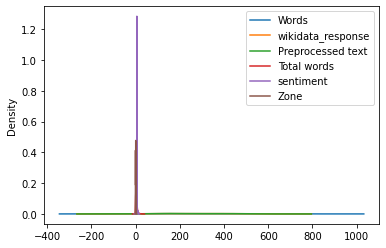

In [32]:
df.plot(kind='density')

In [33]:
X=df.iloc[:, :-1]

In [34]:
X.shape

(689, 5)

In [35]:
X

,Words,wikidata_response,Preprocessed text,Total words,sentiment
349079,578,236,184,2,6
290457,516,62,211,1,6
271455,499,372,353,1,6
97319,317,436,417,5,6
282200,506,464,453,17,8
...,...,...,...,...,...
139483,364,526,522,10,6
6799,205,267,223,3,6
203002,101,278,240,9,10
294642,523,486,480,3,9


In [36]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
y.shape

(689,)

In [37]:
y

349079    3
290457    2
271455    2
97319     1
282200    2
         ..
139483    1
6799      1
203002    0
294642    2
405722    3
Name: Zone, Length: 689, dtype: int64

# **Standard Scaling**

In [38]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

**Split data in train and test category**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Support Vector Machine**

In [40]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear') #Default hyperparameters
model=svc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9782608695652174


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.96      1.00      0.98        54
           2       1.00      0.91      0.95        23
           3       0.96      1.00      0.98        24

    accuracy                           0.98       138
   macro avg       0.98      0.97      0.98       138
weighted avg       0.98      0.98      0.98       138



In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


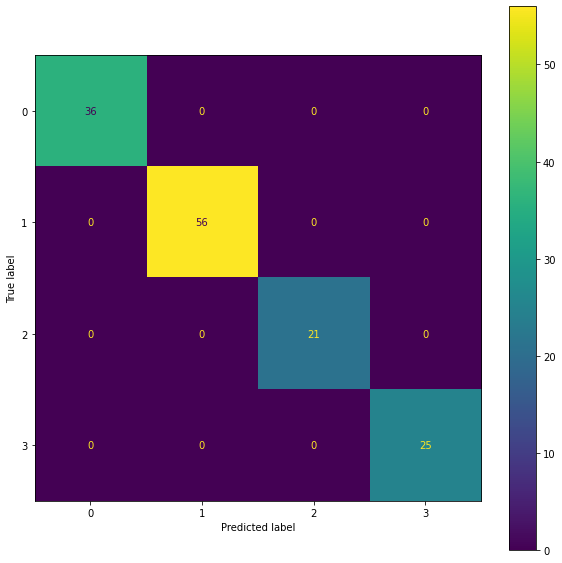

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test, y_pred,ax=ax) 

In [44]:
model=SVC(kernel='linear')
from sklearn.model_selection import cross_validate
cv_results1 = cross_validate(model,X_train, y_train, cv=3)

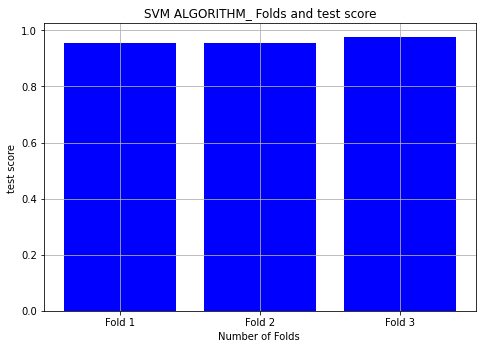

In [46]:
X11=["Fold 1","Fold 2","Fold 3"]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X11,list(cv_results1['test_score']),color='blue')
plt.title("SVM ALGORITHM_ Folds and test score")
plt.xlabel("Number of Folds ")
plt.ylabel("test score ")

plt.grid()
plt.show()

In [47]:
scores1 = cross_validate(model,X_train, y_train, cv=3,
                         scoring=('r2', 'neg_mean_absolute_error'),
                         return_train_score=True)

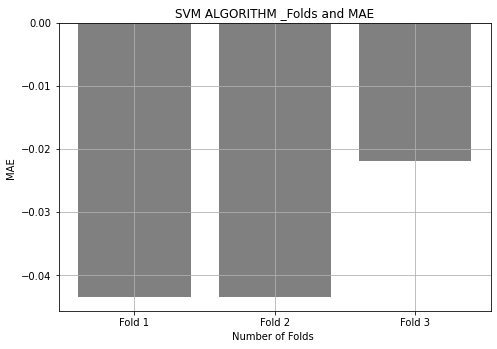

In [48]:
X11=["Fold 1","Fold 2","Fold 3"]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X11,list(scores1['test_neg_mean_absolute_error']),color='grey')
plt.title("SVM ALGORITHM _Folds and MAE")
plt.xlabel("Number of Folds ")
plt.ylabel("MAE ")

plt.grid()
plt.show()

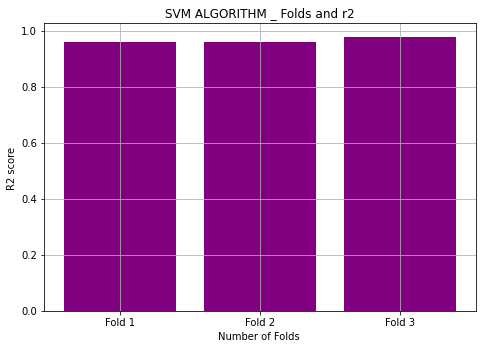

In [49]:
X11=["Fold 1","Fold 2","Fold 3"]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X11,list(scores1['test_r2']),color='purple')
plt.title("SVM ALGORITHM _ Folds and r2")
plt.xlabel("Number of Folds ")
plt.ylabel("R2 score ")

plt.grid()
plt.show()

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9796779893972118

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.021739130434782608

# **Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        24

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


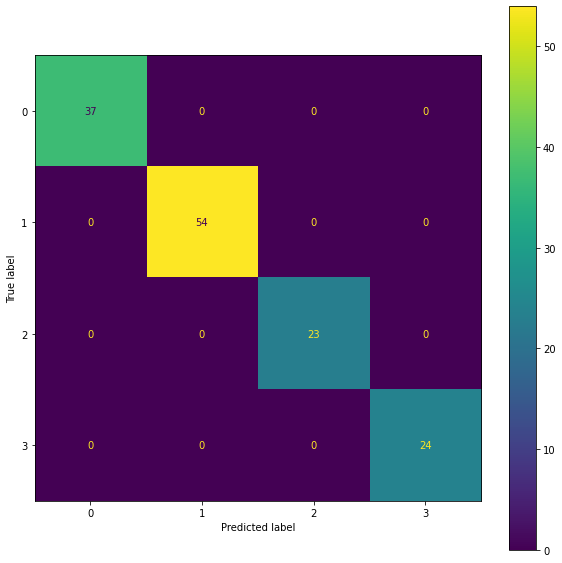

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test, y_pred,ax=ax) 

In [56]:
model = RandomForestClassifier()
from sklearn.model_selection import cross_validate
cv_results2 = cross_validate(model,X_train, y_train, cv=5)

In [57]:
cv_results2['test_score']

array([0.99099099, 1.        , 1.        , 1.        , 0.99090909])

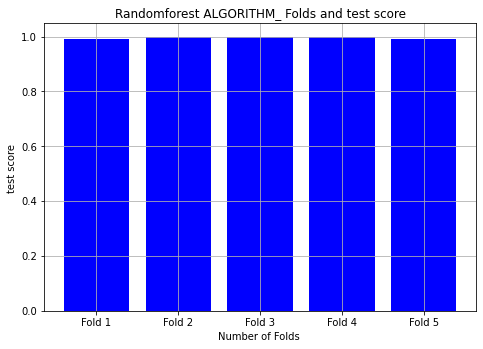

In [58]:
X12=["Fold 1","Fold 2","Fold 3",'Fold 4','Fold 5']
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X12,list(cv_results2['test_score']),color='blue')
plt.title("Randomforest ALGORITHM_ Folds and test score")
plt.xlabel("Number of Folds ")
plt.ylabel("test score ")

plt.grid()
plt.show()

In [59]:
scores2 = cross_validate(model,X_train, y_train, cv=10,
                         scoring=('r2', 'neg_mean_absolute_error'),
                         return_train_score=True)

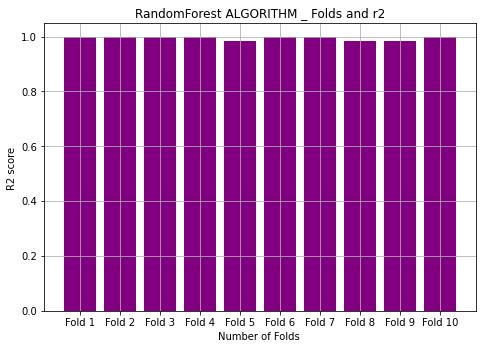

In [60]:
X12=["Fold 1","Fold 2","Fold 3",'Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10']
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X12,list(scores2['test_r2']),color='purple')
plt.title("RandomForest ALGORITHM _ Folds and r2")
plt.xlabel("Number of Folds ")
plt.ylabel("R2 score ")

plt.grid()
plt.show()

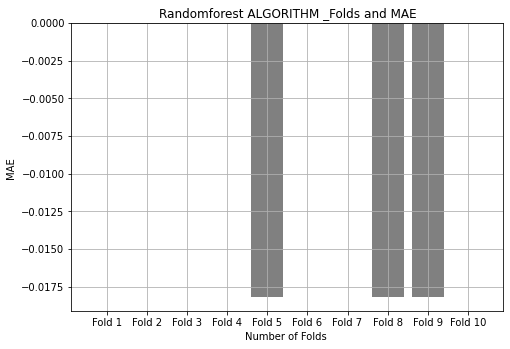

In [61]:
X12=["Fold 1","Fold 2","Fold 3",'Fold 4','Fold 5','Fold 6','Fold 7','Fold 8','Fold 9','Fold 10']
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X12,list(scores2['test_neg_mean_absolute_error']),color='grey')
plt.title("Randomforest ALGORITHM _Folds and MAE")
plt.xlabel("Number of Folds ")
plt.ylabel("MAE ")

plt.grid()
plt.show()

In [62]:
r2_score(y_test,y_pred)

1.0

In [63]:
mean_absolute_error(y_test, y_pred)

0.0

# **XGB classifier**

In [66]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        24

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


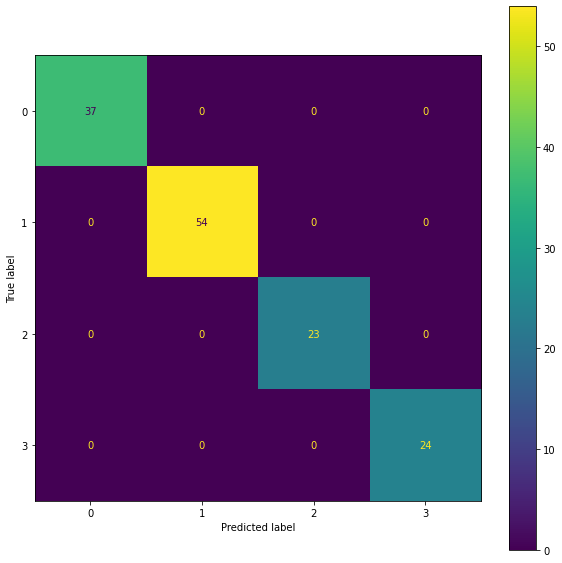

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test, y_pred,ax=ax) 

In [68]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [117]:
df

,Words,wikidata_response,Preprocessed text,Total words,sentiment,Zone
349079,578,236,184,2,6,3
290457,516,62,211,1,6,2
271455,499,372,353,1,6,2
97319,317,436,417,5,6,1
282200,506,464,453,17,8,2
...,...,...,...,...,...,...
139483,364,526,522,10,6,1
6799,205,267,223,3,6,1
203002,101,278,240,9,10,0
294642,523,486,480,3,9,2


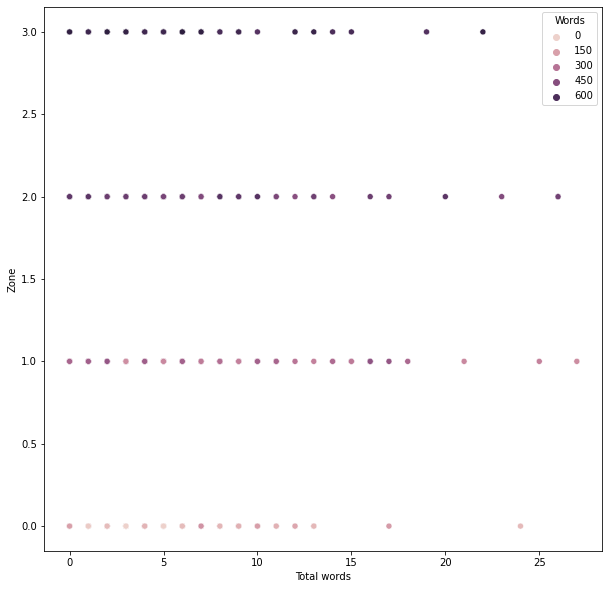

In [118]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='Total words', y='Zone', data=df,
               hue='Words')

# **Correlation Matrix**

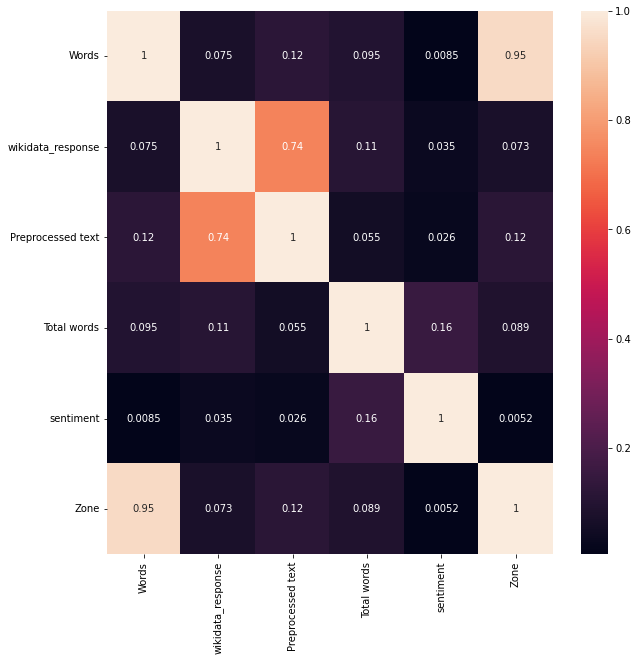

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

**Bar Plot**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e5d59bcd0>,
      dtype=object)

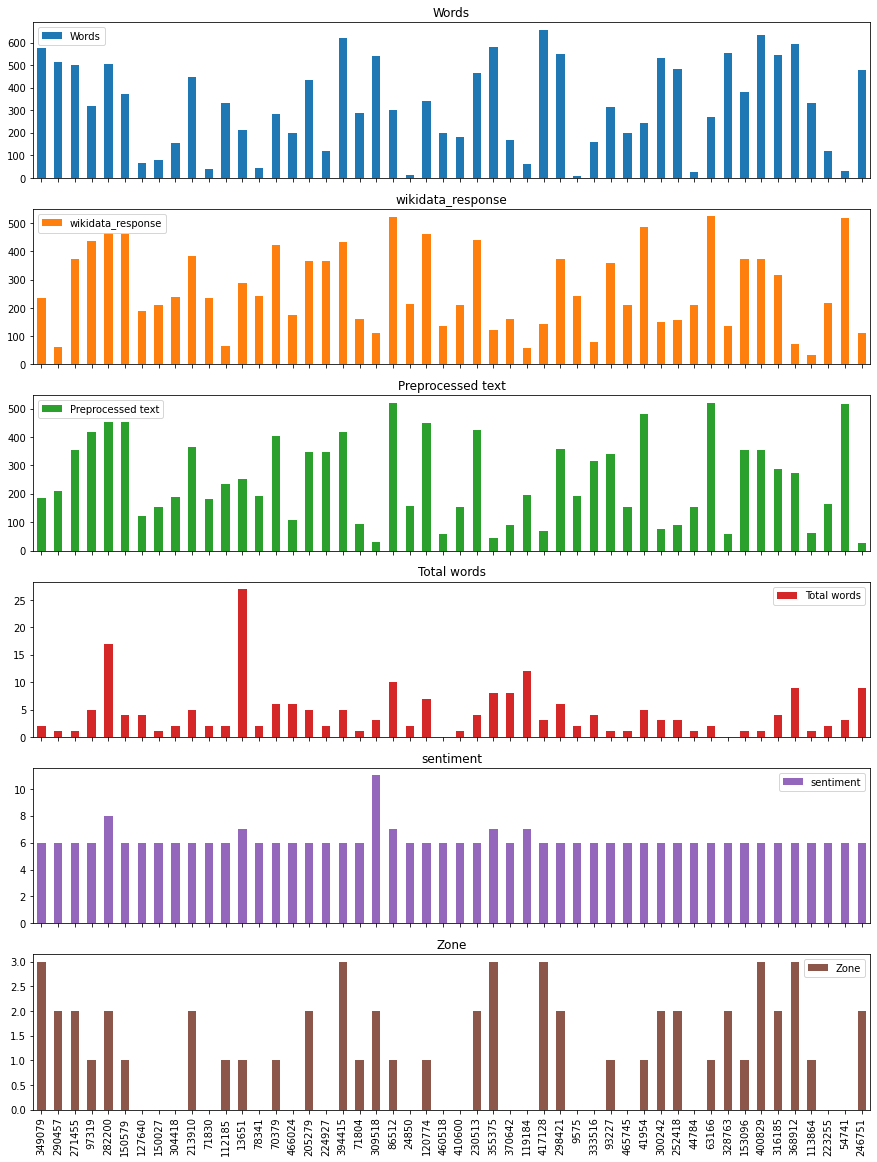

In [121]:
df.head(50).plot.bar(stacked=True,figsize=(15,20),subplots=True)

**Box Plot**

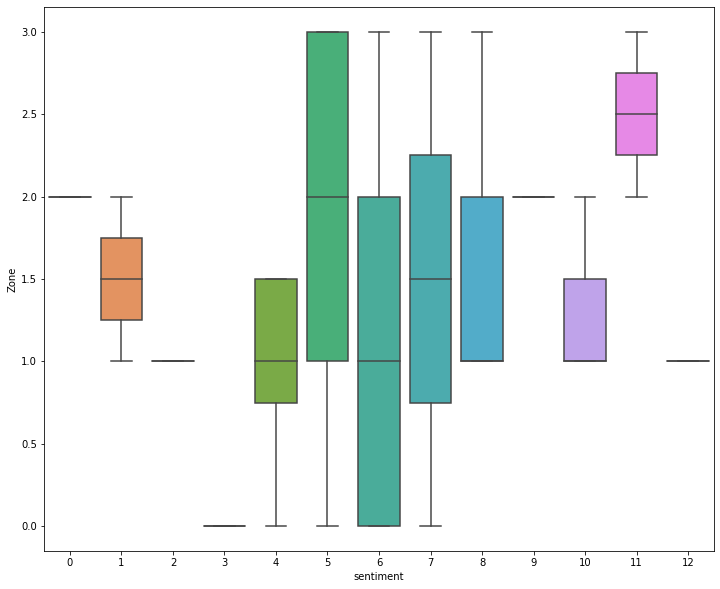

In [124]:
plt.figure(figsize=(12,10))
sns.boxplot(x='sentiment',y="Zone",data=df.head(500),showfliers=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


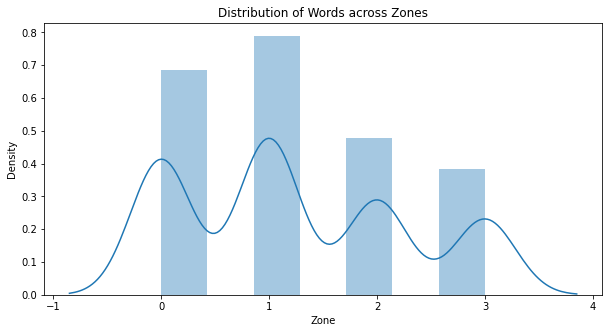

In [129]:
pandas_df = df

plt.figure(figsize=(10,5))
plt.title('Distribution of Words across Zones')
sns.distplot(pandas_df['Zone']);